In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, cluster, silhouette_samples, silhouette_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
import seaborn as sns

In [2]:
data_dir = "./../"
data = pd.read_excel(data_dir + "corona_recovered_ver_00163.xlsx")

In [3]:
data.loc[data['days_between_pos_and_recovery'] > 28, 'Long Covid'] = 1
data.loc[data['days_between_pos_and_recovery'] <= 28, 'Long Covid'] = 0

In [4]:
data.loc[data['gender'] == "Male", 'Male'] = 1
data.loc[data['gender'] == "Female", 'Male'] = 0

In [5]:
# label = data["infectionProb"]

In [6]:
data

,days_between_pos_and_recovery,total_tests_count,age_group,gender,test_indication,Long Covid,Male
0,14.0,1,60+,Female,Contact with confirmed,0.0,0.0
1,9.0,1,30-39,Male,Contact with confirmed,0.0,1.0
2,10.0,1,0-19,Male,Contact with confirmed,0.0,1.0
3,91.0,1,50-59,Male,Contact with confirmed,1.0,1.0
4,11.0,1,60+,Female,Other,0.0,0.0
...,...,...,...,...,...,...,...
1001948,NaN,NaN,0-19,Male,Other,NaN,1.0
1001949,NaN,NaN,40-49,Male,Other,NaN,1.0
1001950,NaN,NaN,50-59,Male,Contact with confirmed,NaN,1.0
1001951,NaN,NaN,40-49,Female,Other,NaN,0.0


In [7]:
data1 = data.drop("infectionProb", axis=1, inplace = False)

KeyError: "['infectionProb'] not found in axis"

# Data Visalisation

<AxesSubplot:xlabel='age_group', ylabel='count'>

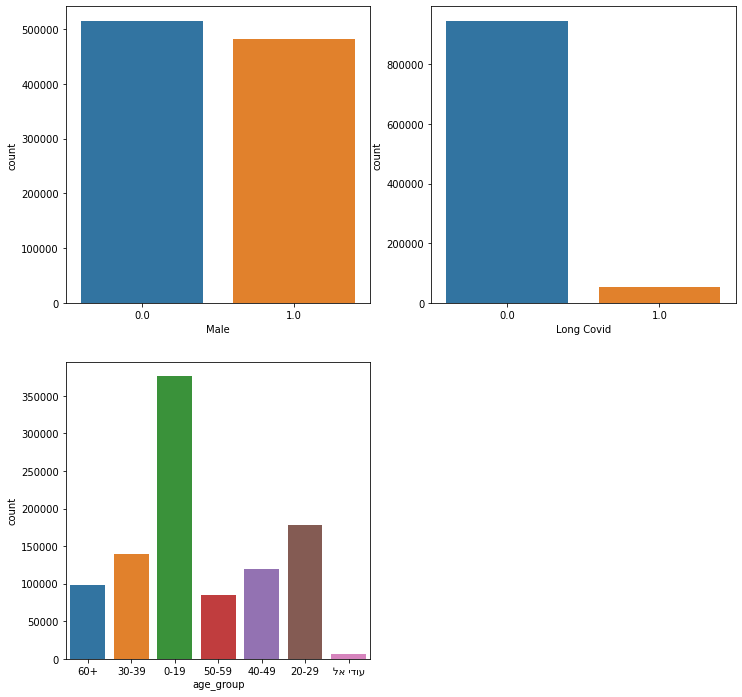

In [8]:
plt.figure(figsize=[12,12])
plt.subplot(221)
sns.countplot(x= "Male", data= data)
plt.subplot(222)
sns.countplot(x= "Long Covid", data= data)
plt.subplot(223)
sns.countplot(x= "age_group", data= data)

<AxesSubplot:xlabel='age_group', ylabel='count'>

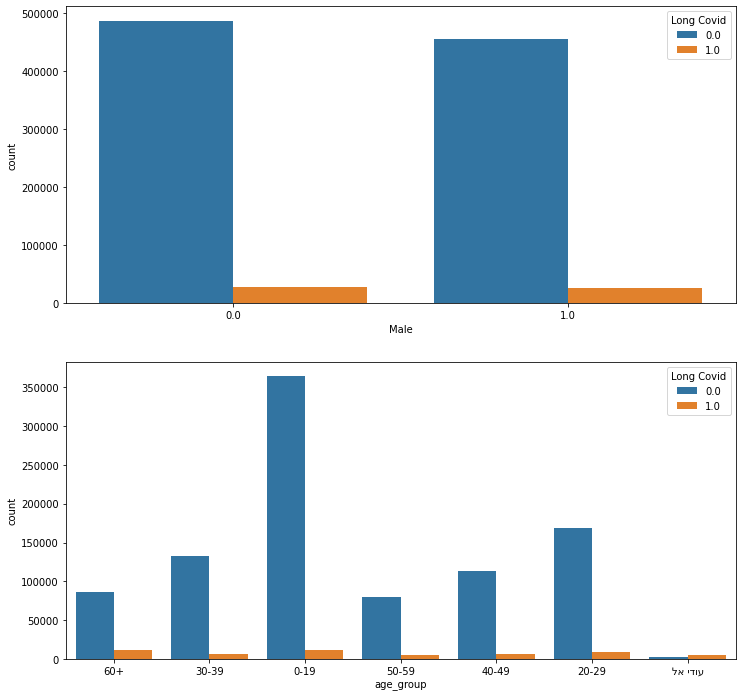

In [9]:
plt.figure(figsize=[12,12])
plt.subplot(211)
sns.countplot(x= "Male",hue = "Long Covid",  data= data)
plt.subplot(212)
sns.countplot(x= "age_group",hue = "Long Covid",  data= data)

<AxesSubplot:xlabel='Long Covid', ylabel='count'>

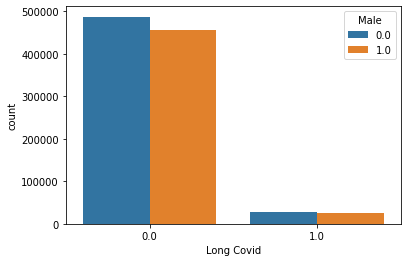

In [14]:
# plt.figure(figsize=[12,12])
# # plt.subplot(211)
# # sns.countplot(x= "Male",  data= data)
# # plt.subplot(221)
sns.countplot(x= "Long Covid",hue = "Male",  data= data)

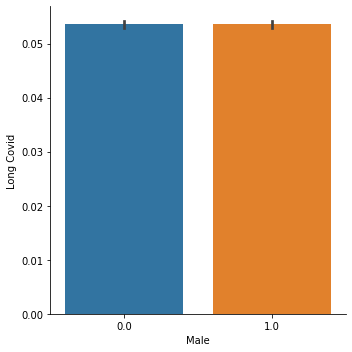

In [17]:
sns.catplot(x="Male", y="Long Covid", kind='bar', data=data)

<AxesSubplot:>

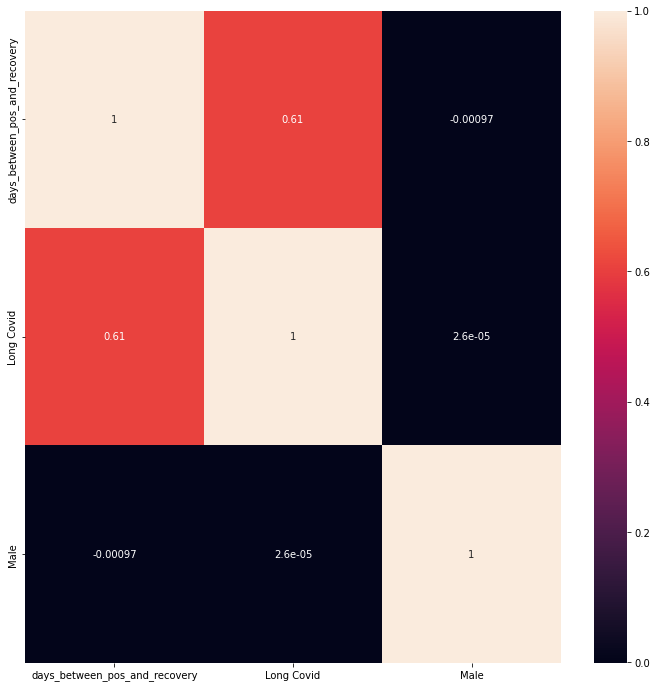

In [42]:
plt.figure(figsize=[12,12])
sns.heatmap(data.corr(), annot=True)

# Age 0-19

In [50]:
age_0_19 = data[data["age_group"]=="0-19"]

In [60]:
print("Percentage of 0-19 age group people affected by Long covid",round(len(age_0_19[age_0_19["Long Covid"]==1])/len(age_0_19)*100, 2), "%")

Percentage of 0-19 age group people affected by Long covid 2.99 %


# Age 20-29

In [61]:
age_20_29 = data[data["age_group"]=="20-29"]

In [63]:
print("Percentage of 20-29 age group people affected by Long covid",round(len(age_20_29[age_20_29["Long Covid"]==1])/len(age_20_29)*100, 2), "%")

Percentage of 20-29 age group people affected by Long covid 4.76 %


# Age 30-39

In [64]:
age_30_39 = data[data["age_group"]=="30-39"]

In [65]:
print("Percentage of 30-39 age group people affected by Long covid",round(len(age_30_39[age_30_39["Long Covid"]==1])/len(age_30_39)*100, 2), "%")

Percentage of 30-39 age group people affected by Long covid 4.9 %


# Age 40-49

In [66]:
age_40_49 = data[data["age_group"]=="40-49"]

In [67]:
print("Percentage of 40-49 age group people affected by Long covid",round(len(age_40_49[age_40_49["Long Covid"]==1])/len(age_40_49)*100, 2), "%")

Percentage of 40-49 age group people affected by Long covid 5.12 %


# Age 50-59

In [68]:
age_50_59 = data[data["age_group"]=="50-59"]

In [69]:
print("Percentage of 50-59 age group people affected by Long covid",round(len(age_50_59[age_50_59["Long Covid"]==1])/len(age_50_59)*100, 2), "%")

Percentage of 50-59 age group people affected by Long covid 6.17 %


# Age 60+

In [70]:
age_60_above = data[data["age_group"]=="60+"]

In [71]:
print("Percentage of 60+ age group people affected by Long covid",round(len(age_60_above[age_60_above["Long Covid"]==1])/len(age_60_above)*100, 2), "%")

Percentage of 60+ age group people affected by Long covid 11.98 %


Text(0, 0.5, 'Percentage having Long Covid')

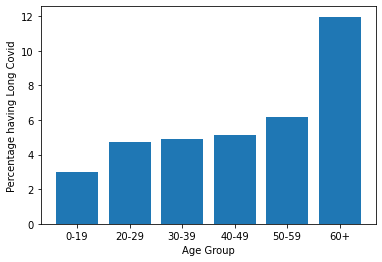

In [76]:
plt.bar(["0-19", "20-29", "30-39", "40-49", "50-59", "60+"],[len(age_0_19[age_0_19["Long Covid"]==1])/len(age_0_19)*100, len(age_20_29[age_20_29["Long Covid"]==1])/len(age_20_29)*100, len(age_30_39[age_30_39["Long Covid"]==1])/len(age_30_39)*100, len(age_40_49[age_40_49["Long Covid"]==1])/len(age_40_49)*100, len(age_50_59[age_50_59["Long Covid"]==1])/len(age_50_59)*100,  len(age_60_above[age_60_above["Long Covid"]==1])/len(age_60_above)*100])
plt.xlabel("Age Group")
plt.ylabel("Percentage having Long Covid")